# Recognizing Handwritten Digits
### This is taken from the Scikit-learn tutorial at:  http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#example-classification-plot-digits-classification-py
### I have added some in-line comments of my own to clarify specific points

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# Import the digits dataset
digits = datasets.load_digits()

In [25]:
# examine the shapes of the data and target arrays
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

In [26]:
# make a list of the images and their targets (to use as labels for a few to be displayed )
images_and_labels = list(zip(digits.images, digits.target))

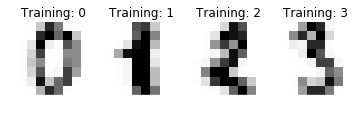

In [27]:
# plot a few of the training images
n_ims = 4
for index, (image, label) in enumerate(images_and_labels[:n_ims]):
    plt.subplot(2, n_ims, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap="Greys", interpolation='none')
    plt.title('Training: %i' % label)

In [28]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
digits.images.shape, data.shape

((1797, 8, 8), (1797, 64))

In [29]:
# Create a classifier: a support vector (with gamma set to 0.001)
classifier = svm.SVC(gamma=0.001)

# Train the classifier on the first half of the data
X = data[ : n_samples / 2]
y = digits.target[ : n_samples / 2 ]
classifier.fit( X, y )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
# Now predict the value of the digit on the second half:
expected = digits.target[ n_samples / 2 : ]
T = data[ n_samples / 2 : ]
predicted = classifier.predict( T )

In [31]:
# check the Confusion matrix & examine the diagonal
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


In [32]:
# Generate a Classification report-- the "recall" column is a measure of how well the 
# classifier is predicting each of the ten digits.
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




In [33]:
a = metrics.classification_report(expected, predicted)

In [48]:
a[-53:]

'avg / total       0.97      0.97      0.97       899\n'

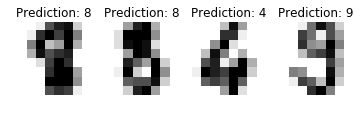

In [49]:
# take a look at the agreement between some of the target images and the predicted digit
images_and_predictions = list(zip(digits.images[ n_samples / 2 : ], predicted ))
for index, (image, prediction) in enumerate(images_and_predictions[:n_ims]):
    plt.subplot(2, n_ims, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)


### Try a quick, crude fine-tuning gamma-- is the initial choice of 0.001 a good one?  Is there a better one?

In [50]:
# generate a few log-spaced values of gamma from 1.e-05 to 0.1
import numpy as np

gam = 10.**np.arange(-5,0,0.5) 
gam

array([  1.00000000e-05,   3.16227766e-05,   1.00000000e-04,
         3.16227766e-04,   1.00000000e-03,   3.16227766e-03,
         1.00000000e-02,   3.16227766e-02,   1.00000000e-01,
         3.16227766e-01])

In [65]:
for g in gam:
    classifier = svm.SVC(gamma=g)

    # Train the classifier on the first half of the data
    X = data[ : n_samples / 2]
    y = digits.target[ : n_samples / 2 ]
    classifier.fit( X, y )
    expected = digits.target[ n_samples / 2 : ]
    T = data[ n_samples / 2 : ]
    predicted = classifier.predict( T )
    print("gamma = {0:.5f} --> recall = {1}".format(np.around(g,decimals=5),
                    metrics.classification_report(expected, predicted)[-35:-30]) )
    
    

gamma = 0.00001 --> recall = 0.83 
gamma = 0.00003 --> recall = 0.92 
gamma = 0.00010 --> recall = 0.94 
gamma = 0.00032 --> recall = 0.96 
gamma = 0.00100 --> recall = 0.97 
gamma = 0.00316 --> recall = 0.95 
gamma = 0.01000 --> recall = 0.92 
gamma = 0.03162 --> recall = 0.41 
gamma = 0.10000 --> recall = 0.01 
gamma = 0.31623 --> recall = 0.01 


#### Okay, gamma = 0.001 turns out be pretty much the best value anyway